<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Зазгрузка-данных" data-toc-modified-id="Зазгрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Зазгрузка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#проверка-на-отсутствующие-значения" data-toc-modified-id="проверка-на-отсутствующие-значения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>проверка на отсутствующие значения</a></span></li><li><span><a href="#Средние-значения-для-тех-кто-ушел-и-тех-кто-остался" data-toc-modified-id="Средние-значения-для-тех-кто-ушел-и-тех-кто-остался-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Средние значения для тех кто ушел и тех кто остался</a></span></li><li><span><a href="#Гистограммы-и-распределения" data-toc-modified-id="Гистограммы-и-распределения-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Гистограммы и распределения</a></span></li><li><span><a href="#Построим-матрицу-корреляций" data-toc-modified-id="Построим-матрицу-корреляций-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Построим матрицу корреляций</a></span></li></ul></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация</a></span></li><li><span><a href="#Выводы-и-рекомендации-по-работе-с-клиентами:" data-toc-modified-id="Выводы-и-рекомендации-по-работе-с-клиентами:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и рекомендации по работе с клиентами:</a></span></li></ul></div>

# Аналитика сети фитнес-центров #


# Описание проекта #
Аналитика данных сети фитнес центров «Культурист-датасаентист» для разработки стратегии взаимодействия с клиентами


# Цель проекта #
Провести анализ и подготовить план действий по удержанию клиентов.

А именно:

научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

проанализировать основные признаки, наиболее сильно влияющие на отток;

сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.

**Описание данных**

`Churn` — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:

`gender` — пол;

`Near_Location`— проживание или работа в районе, где находится фитнес-центр;

`Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — 
в таком случае фитнес-центр хранит информацию о работодателе клиента);

`Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате 

первого абонемента);

`Phone` — наличие контактного телефона;

`Age`— возраст;

`Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

`Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);

`Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);

`Group_visits` — факт посещения групповых занятий;

`Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;

`Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;

`Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный 
салон.

In [15]:
#Загрузка всех необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from IPython.display import display

In [16]:

#!pip install -U seaborn

## Зазгрузка данных ##

In [17]:
df = pd.read_csv('/datasets/gym_churn.csv')
#Выведем первые 5 строк таблицы для лучшего понимания состава данных.
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [18]:
# общая информация по дф
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Length: 4000, dtype: bool

In [20]:
#проверка на дубликаты
percentage = df.duplicated(keep=False).value_counts(normalize=True) * 100
print (percentage)

False    100.0
dtype: float64


### Выводы ###


Рассмотрим внимательно предоставленные данные. В таблице  14 столбцов, 4000 строк.

Тип данных следующий:
    
целочисленный - `gender`, `Near_Location`, `Partner`, `Promo_friends`, `Phone` , `Contract_period`, `Group_visits`, `Age` , `Lifetime` ,`Churn`
    
вещественный - `Avg_additional_charges_total` , `Month_to_end_contract` , `Avg_class_frequency_total`, `Avg_class_frequency_current_month` 

Дубликатов в таблице нет
    

## Исследовательский анализ данных (EDA) ##

* Посмотрим, есть ли в датасете отсутствующие признаки, изучим средние значения и стандартные отклонения

* Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

* строим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

* строим матрицу корреляций и отобразим её

### проверка на отсутствующие значения


In [21]:
#воспользуемся методом describe() 
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Все признаки присутствуют

### Средние значения для тех кто ушел и тех кто остался

In [22]:

df_churn_mean = df.groupby('Churn').mean().reset_index()

In [23]:
df_churn_mean

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Предварительно можно сказать, что чаще уходят те кто пришел один, живет дальше,с меньшей посещаемостью

### Гистограммы и распределения


In [24]:
#Для построения графиков обновила seaborn
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.1)


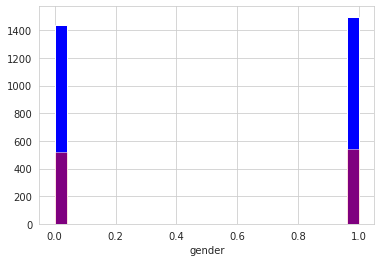

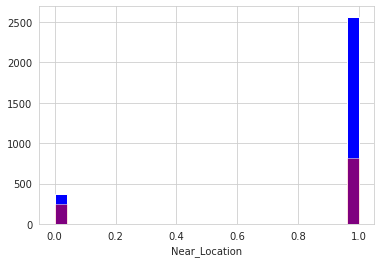

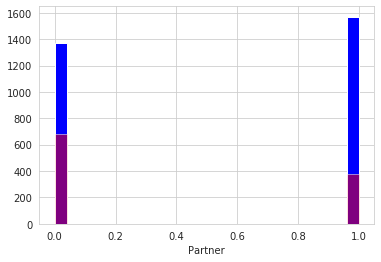

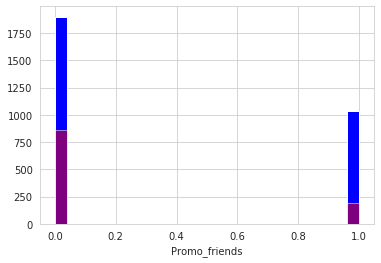

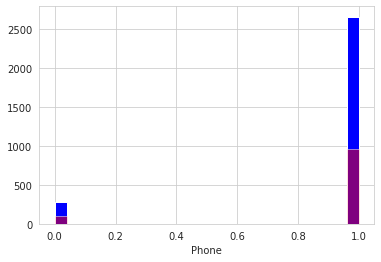

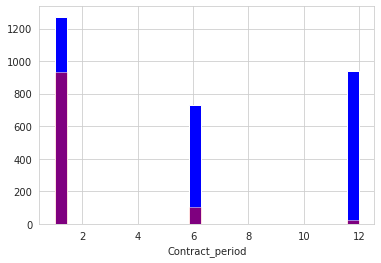

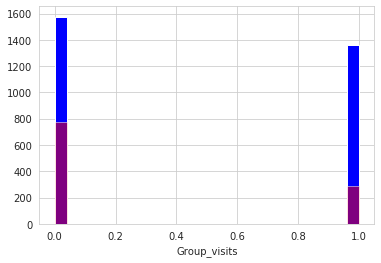

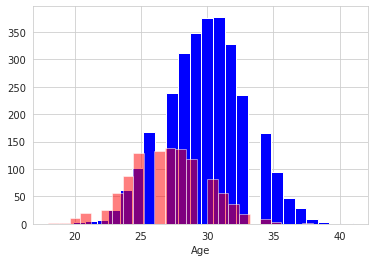

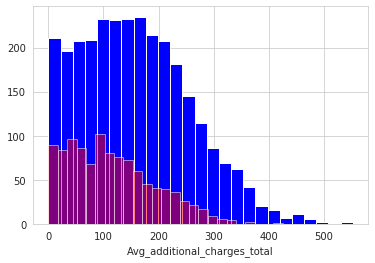

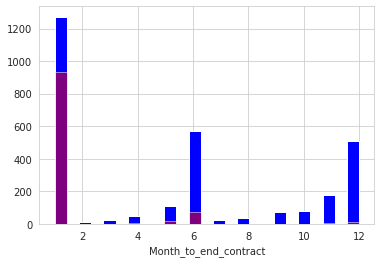

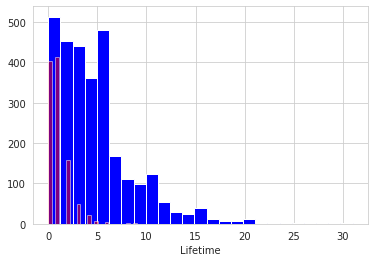

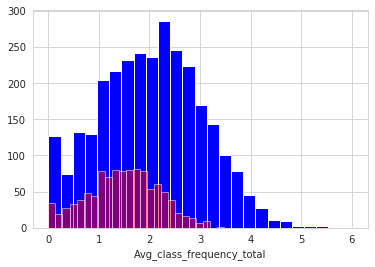

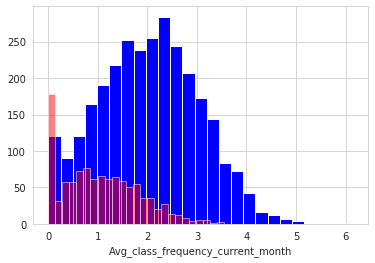

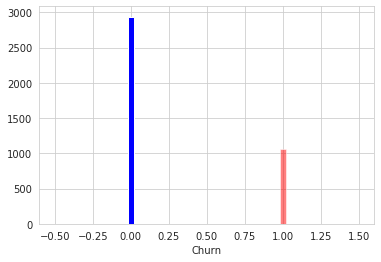

In [27]:
for hist in df.columns:
    df.query('Churn ==0')[hist].hist(bins=25, color='blue')
    df.query('Churn !=0')[hist].hist(bins=25,color='red',alpha=0.5)
    plt.xlabel(hist)
    plt.show()

### Построим матрицу корреляций

In [28]:
corrmat=df.corr()

Text(0.5, 1, 'Тепловая карта корреляции')

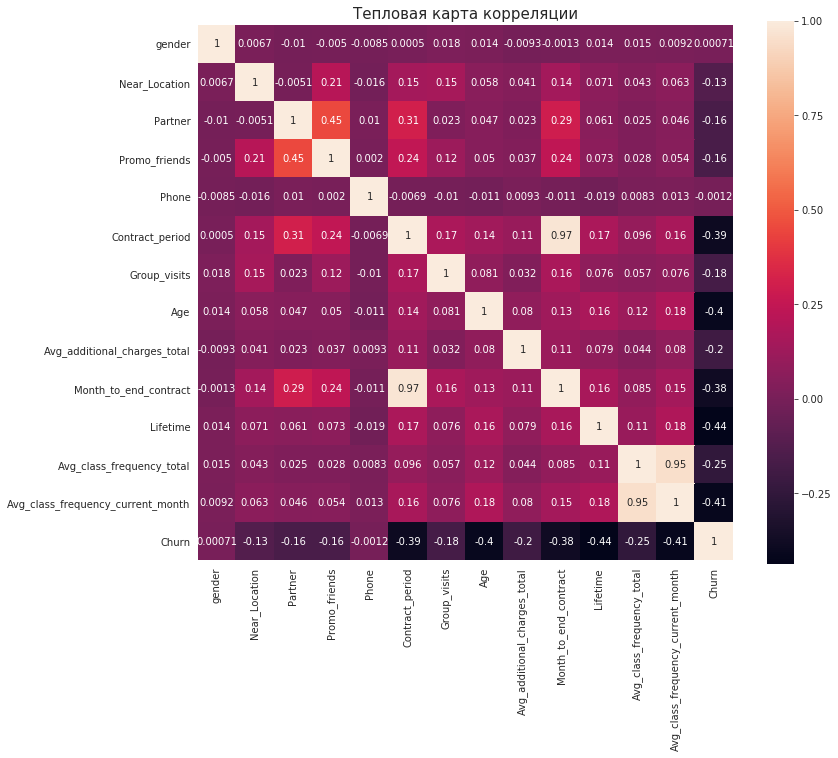

In [29]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, annot = True, square=True, ax=ax)
plt.title(f'Тепловая карта корреляции', fontsize=15)

     

Выделяются следующие пары коррелирующих признаков:

`Avg_class_frequency_total - Avg_class_frequency_current_month`

`Month_to_end_contract-contract_period`

## Построение моделей

In [30]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('Churn', axis = 1)
y = df['Churn']


In [31]:
# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Логистическая регрессия

In [32]:
# зададим алгоритм для нашей модели
model = LogisticRegression(random_state=0)

In [33]:
# обучим модель
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#  прогнозы
predictions =model.predict(X_test)


In [35]:
# выведите все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


### Случайный лес

In [36]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

In [37]:
# обучим модель случайного леса
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
rf_predictions = rf_model.predict(X_test)

In [39]:
# выведите все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82


Метрики модели на основе логистической регрессии оказались выше, то есть логистическая регрессия в нашем случае работает лучше.

## Кластеризация

In [40]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [41]:
#Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков
linked = linkage(X_sc, method = 'ward') 

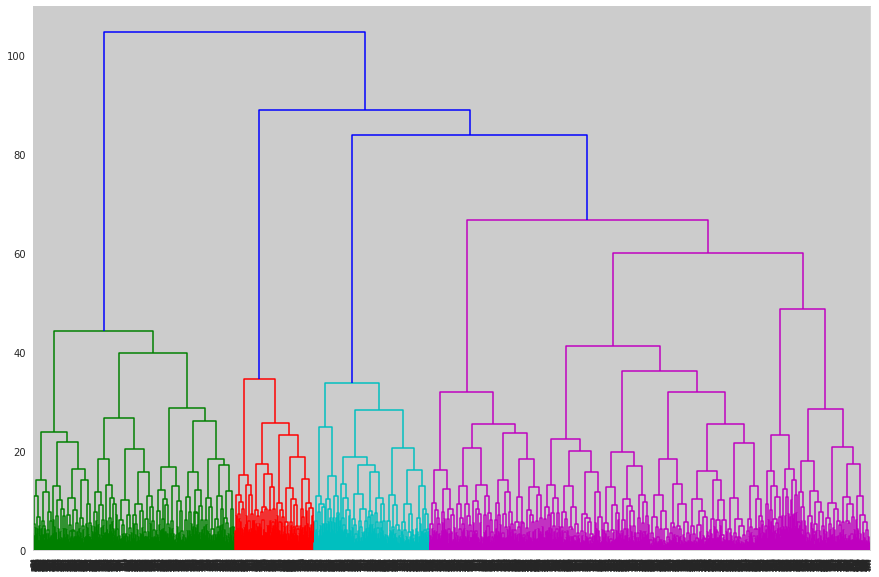

In [42]:
#визуализием как дендрограмму:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

На основании графика можно предположить количество 4 кластера, но в задании предлагают принять их количество равным пяти

In [43]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters=5, random_state=0)

In [44]:
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

In [45]:
#средние значения признаков для кластеров
display(df.groupby('cluster_km').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


Рассмотрим самую перспективную группу клиентов и ту, где самый большой прогноз по оттоку:

**1 группа** ( 0 кластер)

* Прогнозируемый отток-- 2,7%

* Пол не имеет значения

* Живут/работают рядом с центром

* Большинство сотрудник компании-партнёра клуба

* Больше половины пришли по приглашению

* Телефон указан

* Срок абонемента около 11 месяцев

* Чаще других посещают групповые занятия

* Около 30 лет

* Часто оплачивают доп.услуги

* Еще долго до окончания действующего контракта( 10 месяцев)

* Прошло 5 месяцев с момента первого обращения

* Среднее количество посещений в месяц 2


**5 группа** (3 кластер)

* Прогнозируемый отток-- 51,5 %

* Пол не имеет значения

* Живут/работают рядом с центром

* У 35% сотрудник компании-партнёра клуба

* 24%  пришли по приглашению

* Телефон указан

* Срок абонемента около 2 месяцев

* 34% посещают групповые занятия

* Около 28 лет

* Реже оплачивают доп.услуги

* 2месяца до окончания действующего контракта

* Прошло 2,5 месяца с момента первого обращения

* Среднее количесвто помещений в месяц( неделю) 1

In [47]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


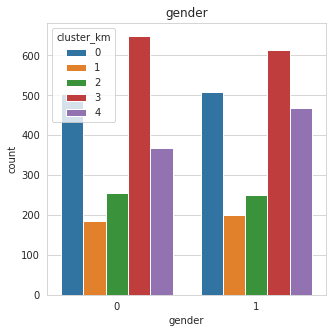

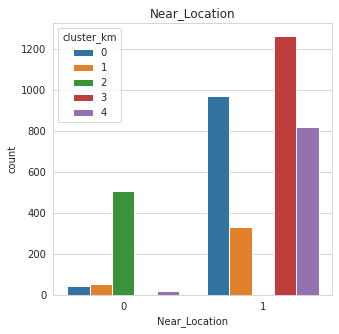

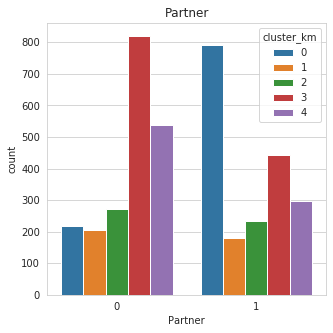

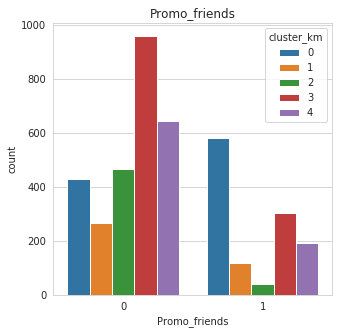

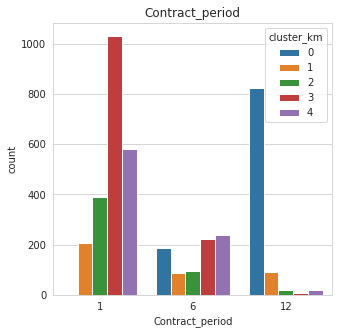

In [48]:
#построим графики распределения для кластеров

for column in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster_km', data=df)
    plt.title(column)
    plt.show()

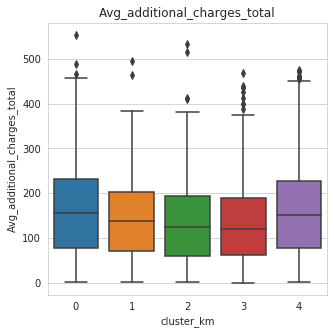

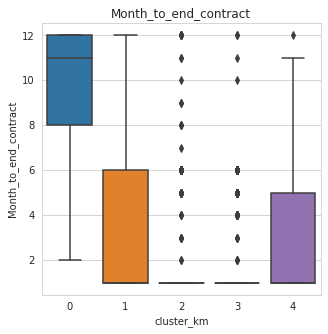

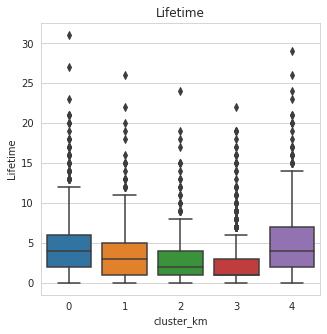

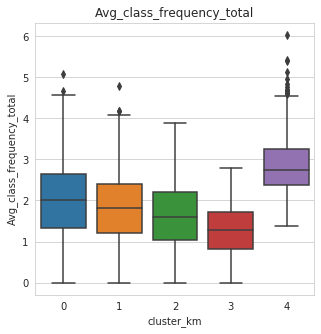

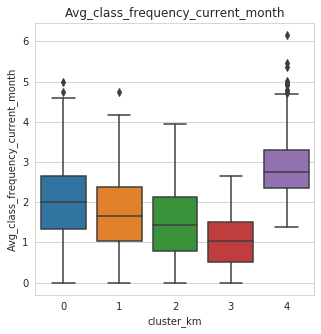

In [49]:

for column in ['Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total','Avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster_km', y = df[column], data = df)
    plt.title(column)
    plt.show()

## Выводы и рекомендации по работе с клиентами:

**Выводы**

Не имеет значения поли есть ли контактные данные клиента. Это никак не влияет на его лояльность клубу

Имеется связь между тем уйдет ли клиент и наличием парнерства в клубе. Также более надежны те,кто пришел по приглашению друга
 
Важным фактором является расположение по отношению к работе/дому. Чем ближе клуб, тем меньше вероятность бросить занятия

У клиентов со сроком контаркта 12 месяцев больше мотивации остаться

Посещаемость важна, но не является самым значимым признаком, важнее сколько денег дополнительно готов потратить клиент

Возраст приверженцев клуба немного выше, тех кто легко уходит.

**Рекомендации**

Увеличить посещаемость групповых занятий , особенно в первые месяцы. Например, предоставить бесплатные занятия в мини-группах


Поощрять дружеские визиты, предоставлять гостевые посещения для друзей и за это предлагать бонусы клиентам

Делать скидки на дополнительные услуги

Предлагать бесплатно продлить абонемент клиентам с высоким средним количество посещений клуба в месяц

Проводить акционное снижение цен на более ждинные контракты.
